In [1]:
from data.Dataset import *
from models import Evaluator3D, models
from utils.LossFunctions import DC_and_CE_loss

In [2]:
torch.manual_seed(0)

In [3]:
dataset_path = "../../data/processed/feta_pro2/"

val = MRIDataset(FeTABalancedDistribution, "val", dataset_path, transform=None)
test = MRIDataset(FeTABalancedDistribution, "test", dataset_path, transform=None)

val_loader = torch.utils.data.DataLoader(dataset=val, batch_size=1)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=1)

In [4]:
criterion = DC_and_CE_loss({'batch_dice': True, 'smooth': 1e-5, 'do_bg': False, 'square': False}, {})

In [5]:
model = models.UNet3D().to('cuda')
model.load_state_dict(torch.load("../../models/20221228/LateGA/weights/26_model.pth"))

<All keys matched successfully>

In [6]:
evaluator = Evaluator3D(criterion, model, (128, 128, 128), test_loader)

In [7]:
cm = evaluator.calculate_cm()

Validation : 100%|██████████| 10/10 [01:21<00:00,  8.12s/it]


In [8]:
cm

array([[66893270,  1045690,   182342,   116985,     3312,    10627,
            5954,     7697],
       [  543315,  3927582,   335590,    71361,    43484,    13453,
            7739,     6857],
       [   83870,   421796,  1523631,   524194,     8661,      679,
           10201,      623],
       [   44959,   158434,   394185,  5469383,   131146,      629,
           63713,     1173],
       [    3787,   132316,    13511,   108089,  1007714,     1236,
           18064,     1468],
       [    4750,   118921,    25137,    66747,      981,   206995,
             203,     1449],
       [   24132,    34702,    16907,   182797,    20271,      196,
          474922,     9335],
       [   10888,    37072,    11826,    29849,     2499,    14808,
           47887,    90242]])

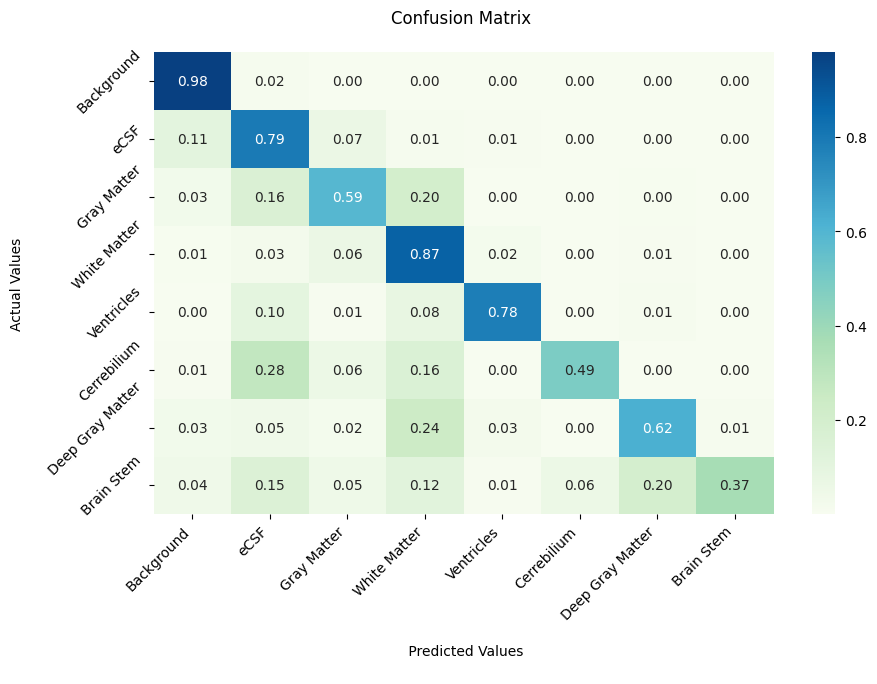

In [9]:
evaluator.plot_confusion_matrix()